In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Prepocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from scipy import stats
from scipy.stats import chi2_contingency
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

Read Data

In [121]:
#Read your data
df_train = pd.read_csv(r'C:\Users\AMINA\OneDrive\S2\S2\Big Data Analysis and App\week 1 -2\train.csv')
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Prepocessing Data

In [122]:
#Get to know the statistic of your data
#https://www.w3schools.com/python/pandas/ref_df_describe.asp

print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


<function matplotlib.pyplot.show(close=None, block=None)>

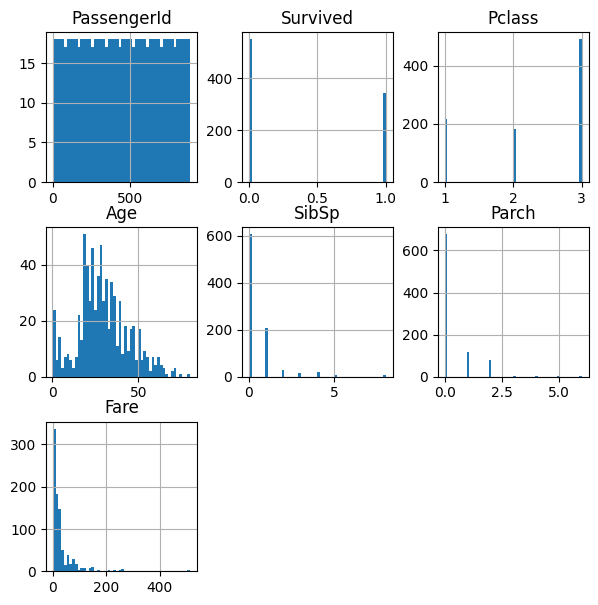

In [123]:
#Visualize your data using histogram
#https://www.kaggle.com/code/ramsesmdlc/titanic-linear-regression-model

df_train.hist(bins= 50, figsize = (7,7))
plt.show

In [124]:
#We can see that Pclass type 1 has the bigger change to survive and they has positive correlation to Survived
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [125]:
#Female has the biggest change to stay alive. Sex has strong correlation to Survived feature
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [126]:
#It's hard to see the correlation between these two variable. Then we will figure it out using correlation function in the next steps
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [127]:
#Quite challenging to see whether Parch is effecting Survive or not
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [128]:
#To find the missing value in our data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
#Replace missing value using mean value
#https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
mean_value=df_train['Age'].mean()
df_train['Age'].fillna(value=mean_value, inplace=True)

#Encode object type into categorical and fill the missing value with mode
#https://stackoverflow.com/questions/66056695/what-does-labelencoder-fit-do
le.fit(df_train['Embarked'])
le.transform(df_train['Embarked'])
df_train['Embarked'] = le.transform(df_train['Embarked'])
mode_value=df_train['Embarked'].mode()
df_train['Embarked'].fillna(value=mode_value, inplace=True)

#Encode object type into categorical and fill the missing value with mode
#https://stackoverflow.com/questions/66056695/what-does-labelencoder-fit-do
le.fit(df_train['Sex'])
le.transform(df_train['Sex'])
df_train['Sex'] = le.transform(df_train['Sex'])

In [130]:
#Because Cabin has too many missing value, we decide to uninclude this variable as one of our input. So we don't fill the missing value
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [131]:
#Drop string data type and index value and use this data to make a correlation
xtrain = df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'],axis=1)
print(xtrain)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]


In [132]:
#We need to know the correlation between all possible inputs and Survived target.
#Use pointbiserial to figure out categorical and numerical data type
#We try to see correlation between Categorical : Survived vs Numerical : Age, SibSp, Parch, Fare
#Only fare has highest number than 3 others numerical data type
#https://stackoverflow.com/questions/67106853/how-to-do-point-biserial-correlation-for-multiple-columns-in-one-iteration

corr_list = []
y = df_train['Survived'].astype(float)

for column in xtrain:
    x=xtrain[column].astype(float)
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])
print(corr_list)

[1.0, -0.3384810359610152, -0.5433513806577559, -0.06980851528714312, -0.03532249888573563, 0.08162940708348347, 0.25730652238496243, -0.16351665142509866]


In [133]:
#Use chi2 Creamer's V to figure out categorical and categorical data type
#We try to see correlation between Categorical : Survived vs Categorical : Pclass, Sex, Embarked
#Only Embarked shows really low correlation. Then we will drop Embarked
#https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/comments

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Crosstab building
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)*2)/(n-1)
    kcorr = k - ((k-1)*2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

for var1 in xtrain:
  col = []
  for var2 in xtrain :
    cramers =cramers_V(xtrain[var1], xtrain[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = xtrain.columns, index =xtrain.columns)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,0.34,0.54,0.17,0.19,0.16,0.45,0.17
Pclass,0.34,1.00,0.13,0.31,0.15,0.02,0.82,0.26
Sex,0.54,0.13,1.00,0.07,0.21,0.25,0.37,0.13
Age,0.17,0.31,0.07,0.95,0.20,0.29,0.16,0.25
SibSp,0.19,0.15,0.21,0.20,1.00,0.24,0.69,0.06
Parch,0.16,0.02,0.25,0.29,0.24,1.00,0.35,0.00
Fare,0.45,0.82,0.37,0.16,0.69,0.35,0.85,0.82
Embarked,0.17,0.26,0.13,0.25,0.06,0.00,0.82,1.00


Create New Data Train

In [134]:
#Drop unused variable from our data input
xtrain = df_train.drop(['PassengerId','Survived', 'Name', 'SibSp', 'Age','Ticket', 'Parch', 'Cabin'],axis=1)
ytrain = df_train['Survived']

xtrain.to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/xtrain.csv', index=False)
ytrain.to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/ytrain.csv', index=False)

Split the data using 5-fold Cross-Validation

In [135]:
#Split training data using 5-fold cross validation
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in cv.split(xtrain, ytrain):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


In [136]:
Path = r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.'
fold_no = 1
for train_index, test_index in cv.split(xtrain, ytrain):
    print("FOLD ",fold_no)
    print("TRAIN:", train_index)
    print("TEST:", test_index)  

    Xtrain = xtrain.iloc[train_index, :]
    Xtest = xtrain.iloc[test_index, :]
    Ytrain = ytrain[train_index]
    Ytest = ytrain[test_index]

    Xtrain.to_csv(Path + 'xtrain' + str(fold_no) + '.csv',index=False)
    Xtest.to_csv(Path + 'xtest' + str(fold_no) + '.csv',index=False)
    Ytrain.to_csv(Path + 'ytrain' + str(fold_no) + '.csv',index=False)
    Ytest.to_csv(Path + 'ytest' + str(fold_no) + '.csv',index=False)

    fold_no += 1

FOLD  1
TRAIN: [  0   1   4   5   7   9  10  11  12  14  15  18  20  21  22  24  25  26
  27  28  29  30  31  32  33  35  36  37  38  39  40  41  42  43  44  45
  46  48  51  52  53  54  55  57  58  61  62  63  64  66  67  68  70  71
  72  74  75  76  77  78  79  80  82  83  86  87  88  89  91  92  93  95
  96  97  98  99 100 102 103 104 105 108 109 110 112 113 114 115 116 118
 120 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 143 144 145 146 147 149 150 151 152 153 155 156 157 158 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177 178 179
 182 183 184 185 186 188 190 191 192 193 194 196 197 198 199 200 203 204
 206 208 209 210 211 212 213 214 215 217 218 219 220 221 222 224 225 226
 227 228 229 230 231 232 234 235 236 237 239 240 243 244 245 246 247 248
 249 250 251 252 253 254 256 259 260 261 263 264 266 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 291
 292 293 295 296 297 299 300 301 302

In [137]:
xtrainfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtrain1.csv')
xtrainfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtrain2.csv')
xtrainfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtrain3.csv')
xtrainfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtrain4.csv')
xtrainfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtrain5.csv')

xtestfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtest1.csv')
xtestfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtest2.csv')
xtestfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtest3.csv')
xtestfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtest4.csv')
xtestfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.xtest5.csv')

ytrainfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytrain1.csv')
ytrainfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytrain2.csv')
ytrainfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytrain3.csv')
ytrainfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytrain4.csv')
ytrainfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytrain5.csv')

ytestfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytest1.csv')
ytestfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytest2.csv')
ytestfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytest3.csv')
ytestfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytest4.csv')
ytestfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\TITANIC\HW1\fold\.ytest5.csv')


# Create Logistic Regression Classification
#https://realpython.com/logistic-regression-python/#logistic-regression-python-packages

In [138]:
LR1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LR1.fit(xtrainfold1, ytrainfold1)
ypredLR1 = LR1.predict(xtestfold1)
print(classification_report(ytestfold1, ypredLR1))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       106
           1       0.76      0.68      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
LR2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LR2.fit(xtrainfold2, ytrainfold2)
ypredLR2 = LR2.predict(xtestfold2)
print(classification_report(ytestfold2, ypredLR2))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       101
           1       0.71      0.60      0.65        77

    accuracy                           0.72       178
   macro avg       0.72      0.70      0.71       178
weighted avg       0.72      0.72      0.72       178



C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
LR3 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LR3.fit(xtrainfold3, ytrainfold3)
ypredLR3 = LR3.predict(xtestfold3)
print(classification_report(ytestfold3, ypredLR3))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.71      0.71        69

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
LR4 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LR4.fit(xtrainfold4, ytrainfold4)
ypredLR4 = LR4.predict(xtestfold4)
print(classification_report(ytestfold4, ypredLR4))

C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       116
           1       0.73      0.77      0.75        62

    accuracy                           0.82       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.82      0.82       178



In [142]:
LR5 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LR5.fit(xtrainfold5, ytrainfold5)
ypredLR5 = LR5.predict(xtestfold5)
print(classification_report(ytestfold5, ypredLR5))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       117
           1       0.71      0.69      0.70        61

    accuracy                           0.80       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.80      0.80      0.80       178



C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Create a random forest classifier

In [143]:
RF1 = RandomForestClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
RF1.fit(xtrainfold1, ytrainfold1)
ypredRF1 = RF1.predict(xtestfold1)
print(classification_report(ytestfold1, ypredRF1))

C:\Users\AMINA\AppData\Local\Temp\ipykernel_22832\895330965.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF1.fit(xtrainfold1, ytrainfold1)


              precision    recall  f1-score   support

           0       0.78      0.92      0.85       106
           1       0.85      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [144]:
RF2 = RandomForestClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
RF2.fit(xtrainfold2, ytrainfold2)
ypredRF2 = RF2.predict(xtestfold2)
print(classification_report(ytestfold2, ypredRF2))

C:\Users\AMINA\AppData\Local\Temp\ipykernel_22832\3341806088.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF2.fit(xtrainfold2, ytrainfold2)


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       101
           1       0.78      0.66      0.72        77

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.77       178



In [145]:
RF3 = RandomForestClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
RF3.fit(xtrainfold3, ytrainfold3)
ypredRF3 = RF3.predict(xtestfold3)
print(classification_report(ytestfold3, ypredRF3))

C:\Users\AMINA\AppData\Local\Temp\ipykernel_22832\780552014.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF3.fit(xtrainfold3, ytrainfold3)


              precision    recall  f1-score   support

           0       0.81      0.91      0.86       109
           1       0.82      0.67      0.74        69

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [146]:
RF4 = RandomForestClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
RF4.fit(xtrainfold4, ytrainfold4)
ypredRF4 = RF4.predict(xtestfold4)
print(classification_report(ytestfold4, ypredRF4))

C:\Users\AMINA\AppData\Local\Temp\ipykernel_22832\725818436.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF4.fit(xtrainfold4, ytrainfold4)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       116
           1       0.79      0.73      0.76        62

    accuracy                           0.84       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.84      0.84      0.84       178



In [147]:
RF5 = RandomForestClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
RF5.fit(xtrainfold5, ytrainfold5)
ypredRF5 = RF5.predict(xtestfold5)
print(classification_report(ytestfold5, ypredRF5))

C:\Users\AMINA\AppData\Local\Temp\ipykernel_22832\1933291975.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF5.fit(xtrainfold5, ytrainfold5)


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       117
           1       0.72      0.80      0.76        61

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.83      0.83      0.83       178



Random Forest - Hyperparameter Tuning

To find best parameter on line 141-146 we use this code from this source
https://www.datacamp.com/tutorial/random-forests-classifier-python 

In [148]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
RF = RandomForestClassifier()

In [149]:
# Use random search to find the best hyperparameters
rand_search1 = RandomizedSearchCV(RF, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search1.fit(xtrain, ytrain)

# Create a variable for the best model
best_rf1 = rand_search1.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search1.best_params_)

# Generate predictions with the best model
ypredRFtun1 = best_rf1.predict(xtestfold1)
print(classification_report(ytestfold1, ypredRFtun1))

Best hyperparameters: {'max_depth': 9, 'n_estimators': 356}
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       106
           1       0.96      0.75      0.85        73

    accuracy                           0.89       179
   macro avg       0.91      0.87      0.88       179
weighted avg       0.90      0.89      0.89       179



In [150]:
# Use random search to find the best hyperparameters
rand_search2 = RandomizedSearchCV(RF, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search2.fit(xtrain, ytrain)

# Create a variable for the best model
best_rf2 = rand_search2.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search2.best_params_)

# Generate predictions with the best model
ypredRFtun2 = best_rf2.predict(xtestfold2)
print(classification_report(ytestfold2, ypredRFtun2))

Best hyperparameters: {'max_depth': 7, 'n_estimators': 454}
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       101
           1       0.93      0.68      0.78        77

    accuracy                           0.84       178
   macro avg       0.86      0.82      0.83       178
weighted avg       0.85      0.84      0.83       178



In [151]:
# Use random search to find the best hyperparameters
rand_search3 = RandomizedSearchCV(RF, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search3.fit(xtrain, ytrain)

# Create a variable for the best model
best_rf3 = rand_search3.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search3.best_params_)

# Generate predictions with the best model
ypredRFtun3 = best_rf3.predict(xtestfold3)
print(classification_report(ytestfold3, ypredRFtun3))

Best hyperparameters: {'max_depth': 6, 'n_estimators': 331}
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       109
           1       0.94      0.68      0.79        69

    accuracy                           0.86       178
   macro avg       0.88      0.83      0.84       178
weighted avg       0.87      0.86      0.85       178



In [152]:
# Use random search to find the best hyperparameters
rand_search4 = RandomizedSearchCV(RF, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search4.fit(xtrain, ytrain)

# Create a variable for the best model
best_rf4 = rand_search4.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search4.best_params_)

# Generate predictions with the best model
ypredRFtun4 = best_rf4.predict(xtestfold4)
print(classification_report(ytestfold4, ypredRFtun4))

Best hyperparameters: {'max_depth': 6, 'n_estimators': 270}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       116
           1       0.94      0.74      0.83        62

    accuracy                           0.89       178
   macro avg       0.91      0.86      0.88       178
weighted avg       0.90      0.89      0.89       178



In [153]:
# Use random search to find the best hyperparameters
rand_search5 = RandomizedSearchCV(RF, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search5.fit(xtrain, ytrain)

# Create a variable for the best model
best_rf5 = rand_search5.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search5.best_params_)

# Generate predictions with the best model
ypredRFtun5 = best_rf5.predict(xtestfold5)
print(classification_report(ytestfold5, ypredRFtun5))

Best hyperparameters: {'max_depth': 9, 'n_estimators': 101}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       117
           1       0.86      0.84      0.85        61

    accuracy                           0.90       178
   macro avg       0.89      0.88      0.89       178
weighted avg       0.90      0.90      0.90       178



In [154]:
df_test=pd.read_csv(r'C:\Users\AMINA\OneDrive\S2\S2\Big Data Analysis and App\week 1 -2\test.csv')
df_test=df_test.drop(['PassengerId', 'Name', 'SibSp', 'Age','Ticket', 'Parch','Cabin'], axis=1)

le.fit(df_test['Sex'])
le.transform(df_test['Sex'])
df_test['Sex'] = le.transform(df_test['Sex'])

le.fit(df_test['Embarked'])
le.transform(df_test['Embarked'])
df_test['Embarked'] = le.transform(df_test['Embarked'])

mean_value=df_test['Fare'].mean()
df_test['Fare'].fillna(value=mean_value, inplace=True)

df_test.to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/testRF.csv', index=False)
print(df_test)

     Pclass  Sex      Fare  Embarked
0         3    1    7.8292         1
1         3    0    7.0000         2
2         2    1    9.6875         1
3         3    1    8.6625         2
4         3    0   12.2875         2
..      ...  ...       ...       ...
413       3    1    8.0500         2
414       1    0  108.9000         0
415       3    1    7.2500         2
416       3    1    8.0500         2
417       3    1   22.3583         0

[418 rows x 4 columns]


In [155]:
df_test.isnull().sum()

Pclass      0
Sex         0
Fare        0
Embarked    0
dtype: int64

Predict New Data Test

In [156]:
ypredLR4 = LR4.predict(df_test)
print(ypredLR4)
pd.DataFrame(ypredLR4).to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/PredResult/LR4.csv', header=False, index=False)



[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [157]:
ypredRF4 = RF4.predict(df_test)
print(ypredRF4)
pd.DataFrame(ypredRF4).to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/PredResult/RF4.csv', header=False, index=False)



[0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


In [158]:
ypredRFtun5 = best_rf5.predict(df_test)
print(ypredRF5)
pd.DataFrame(ypredRFtun5).to_csv('C:/Users/AMINA/Documents/belajar python/TITANIC/HW1/PredResult/RFtun5.csv', header=False, index=False)




[0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
